# Trees 🌲 🌴 🌳

- What is a tree?
  - Parent
  - Children
  - Root
  - Leaf
- Traversal
  - pre-order
  - post-order
  - DFS
  - BFS
- Binary Search Trees
  - Only two children, specific meaning
  - Inorder traversal
  - Searching for a value
  - Big O for search
  
## Next time
- Adding to a BST
- Removing from a BST
- Big O for add/remove
- Best case/worst case for BST?

## AVL
- Balancing trees

## What is a tree?

- It's like a linked list, but each node can have more than one child.
- Each node can have only one parent

In [ ]:
%%file tree.txt
digraph {
    A->B
    A->C
    A->D
    B->E
    C->F
    C->G
    C->H
}

In [ ]:
!dot -Tdot tree.txt > tree.dot

In [ ]:
!dot -Tpng tree.dot > tree.png

<img src="tree.png"/>

## Examples of Trees

- Folders and files on your computer
- Management hierarchy in an organization
- Church unit organization (classes, wards, stakes, areas)

## How to Talk About Trees
*A Beginners Guide*

<img src="tree.png"/>

- The node with no parent is called the **root**.
- A node with no children is called a **leaf**.

Which nodes in the tree above are leaves?

Which node is the root?

<img src="tree.png"/>

- The distance of a node to the root is the node's **depth**
- The distance of a node to its lowest leaf is the node's **height**
- The height of a tree is the height of its root.

What is the height of this tree?

What is the height of D?

What is the height of C?

What is the depth of A?

What is the depth of H?

Do all leaves have the same depth?

Do all leaves have the same height?

## Trees and Recursion

Trees are recursive in nature. 

Every child represents a subtree. That subtree may have 1 or more members. 

As you remember, recursive algorithms are good for data structures with a recursive structure. 

<div class='big centered' style='font-size: 100pt'> 🌲 ❤️ RECURSION </div>

In [1]:
#include <vector>
#include <string>
#include <map>
#include <iostream>
using namespace std;

In [2]:
template<class T>
struct Node {
    T value;
    vector<Node*> children;
    
    explicit Node(T value) : value(value), children() {}
    
    Node<T>* add(T item) {
        auto node = new Node<T>(item);
        children.push_back(node);
        return node;
    }
};

In [3]:
template<class T>
void print(Node<T>* const& node, string const& prefix) {
    
    cout << prefix << node->value << endl;
    
    for (auto child : node->children) {
        print(child, prefix + "  ");
    }
}

In [4]:
Node<string>* home = new Node<string>("Home/");
auto docs = home->add("Documents/");
docs->add("cs235/");
docs->add("personal/");
auto down = home->add("Downloads/");
down->add("cat videos/");
down->add("tree-info.pdf");

In [5]:
print(home, "")

Home/
  Documents/
    cs235/
    personal/
  Downloads/
    cat videos/
    tree-info.pdf


<img src="tree.png"/>

In [6]:
auto A = new Node<string>("A");

auto B = A->add("B");
auto C = A->add("C");
A->add("D");

B->add("E");

C->add("F");
C->add("G");
C->add("H");

In [7]:
print(A, "")

A
  B
    E
  C
    F
    G
    H
  D


## Searching a Tree

There are two general approaches for searching a tree—i.e. navigating through all the nodes.

- **Depth-first-search (DFS)**
- **Breadth-first-search (BFS)**

## Depth-First-Search (DFS)

Depth-first means that before moving on to the second child, you explore the children of the first child.

You go deep before you go broad. 

So, in our example tree, you explore B before you explore C, but in the process of exploring B you explore E, etc.

What is the node ordering using DFS on this tree?

<img src="tree.png"/>

In [ ]:
%%file tree-dfs.extra
    A->B [color="red"]
    B->E [color="red"]
    E->B [color="blue"]
    B->A [color="blue"]
    A->C [color="red"]
    C->F [color="red"]
    F->C [color="blue"]
    C->G [color="red"]
    G->C [color="blue"]
    C->H [color="red"]
    H->C [color="blue"]
    C->A [color="blue"]
    A->D [color="red"]
}

In [ ]:
%%file tree-dfs.extra
    A->B [color="red"]
    B->E [color="red"]
    E->C [color="red"]
    C->F [color="red"]
    F->G [color="red"]
    G->H [color="red"]
    H->D [color="red"]
}

In [ ]:
! { head -n -1 tree.dot; cat tree-dfs.extra; } | neato -n -Tpng > tree-dfs.png

<img src='tree-dfs.png'/>

A, B, E, C, F, G, H, D

DFS has the property that before a node is fully searched, all of its decendents must be searched.

This means that the last nodes to be found are the first nodes to be finished.

What data structure do you think of when you hear **last in first out**?

A stack!

In [8]:
#include <stack>

In [9]:
template<class T>
void dfs_stack(Node<T>* const& node) {
    stack<Node<T>*> nodes;
    nodes.push(node);
    while (!nodes.empty()) {
        Node<T>* current = nodes.top();
        nodes.pop();
        cout << current->value << endl;
        for (auto child : current->children) {
            nodes.push(child);
        }
    }
}

In [10]:
dfs_stack(A)

A
D
C
H
G
F
B
E


If you can do it with a stack you can probably do it with the call stack.

In [11]:
template<class T>
void dfs_recurse(Node<T>*& node) {
    cout << node->value << endl;
    for (auto child : node->children) {
        dfs_recurse(child);
    }
}

In [12]:
dfs_recurse(A)

A
B
E
C
F
G
H
D


For trees in general, it doesn't matter in which order we visit the children.

- In our stack example, we visited the children in reverse order.
- In our recursion example, we visited the children in inserted order. 

However, for some types of trees there may be an order that makes more sense, or is even required.
- Stay tuned!

## Breadth-First-Search (BFS)

Sometimes you may choose to use a **breadth-first-search**. 

This means that visit all children of a node before visiting any of the childrens' children.

What is the node ordering you get using BFS on the following tree?

<img src="tree.png"/>

In [ ]:
%%file tree-bfs.extra
    A->B [color="red"]
    B->C [color="red"]
    C->D [color="red"]
    D->E [color="red"]
    E->F [color="red"]
    F->G [color="red"]
    G->H [color="red"]
}

In [ ]:
! { head -n -1 tree.dot; cat tree-bfs.extra; } | neato -n -Tpng > tree-bfs.png

<img src="tree-bfs.png"/>

A, B, C, D, E, F, G, H

Breadth-first-search has the quality that nodes that are visited first are finished first.

What data structure comes to mind when you hear **first in first out**?

A queue!

In [13]:
#include <queue>

In [14]:
template<class T>
void bfs(Node<T>* const& node) {
    queue<Node<T>*> nodes;
    nodes.push(node);
    
    while (!nodes.empty()) {
        auto & current = nodes.front();
        nodes.pop();
    
        cout << current->value << endl;
        for (auto child : current->children) {
            nodes.push(child);
        }
    }
}

In [15]:
bfs(A)

A
B
C
D
E
F
G
H


<img src="tree-bfs.png"/>

## Traversal

The process of listing the nodes of a tree is called **traversal**.

DFS and BFS are two strategies for traversing a tree. In either case, there is another question to consider:

Do you process the current node *before* or *after* you process the children?

**Preorder** traversal means that you process a node *before* you process its children.

**Postorder** traversal means that you process a node *after* you process its children.

While in theory there is a postorder BFS traversal, I've never seen it used, so we won't go into it.

Unless otherwise specified, **preorder** and **postorder** traversals assume a DFS strategy. 

The two examples of DFS and BFS we saw previously were preorder traversals.

What is the DFS postorder traversal of our tree?

<img src="tree.png"/>

E, B, F, G, H, C, D, A

In [16]:
template<class T>
void dfs_pre(Node<T>*& node) {
    
    cout << node->value << endl;
    
    for (auto child : node->children) {
        dfs_pre(child);
    }
}

In [17]:
template<class T>
void dfs_post(Node<T>*& node) {
    
    for (auto child : node->children) {
        dfs_post(child);
    }
    
    cout << node->value << endl;
}

In [18]:
dfs_pre(A)

A
B
E
C
F
G
H
D


In [19]:
dfs_post(A)

E
B
F
G
H
C
D
A


## Trees: Key Ideas

- A tree is a collection of nodes (i.e. a *graph*) with directed edges where each node has at most one parent
  - A node may have zero to many children
- Key terms:
  - Root
  - Leaf
  - Depth
  - Height
- The order of children to a node may or may not be defined.
  - Some specific types of trees have a defined ordering, but the concept of trees in general does not.
- The process of visiting each node in a tree is called a search or traversal
  - Depth-first-search (DFS) searches children before siblings
    - It has a succinct recursive relationship and comes up in many applications
  - Breadth-first-search (BFS) searches siblings before children
  - Preorder traversal processes the parent before the children
  - Postorder traversal processes the children before the parent

<img src="https://imgs.xkcd.com/comics/depth_and_breadth.png?1" width="600"/>

<img src="https://imgs.xkcd.com/comics/dfs.png" />

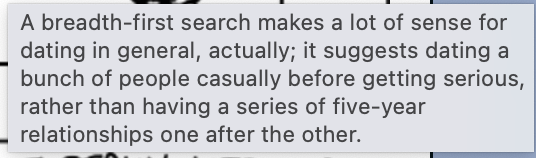